<a href="https://colab.research.google.com/github/MarcusStafford-MLS/marcus-stafford.github.io/blob/main/tree_species_program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Installation of any necessary modules should be completed here
!pip install geopandas keplergl
!pip install geopandas mapclassify contextily
!sudo apt install -y libspatialindex-dev
!pip install rtree geoplot
!pip install scikit-learn
!pip install shapely as sh

import pandas as pd
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt
import shapely as sh
from sklearn.preprocessing import LabelEncoder
import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output
from geopy.geocoders import Nominatim
import geoplot as gplt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 25.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Created wheel for keplergl: filename=keplergl-0.3.2-py2.py3-none-any.whl size=17922315 sha256=889acc18492d4c2275e1802df9b048b5224a828e72a133b8642cf3ff854bcba8
  Stored in directory: /root/.cache/pip/wheels/e5/e9/db/b8b8f2fcb5cb1cd7268d88959fce267bc00697cb8f50dcd0d9
Successfully built keplergl
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 43.4 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c6 libspatialindex6
The following NEW packages will be installed:
  libspatialindex-c6 libspatialindex-dev libspatialindex6
0 upgraded, 3 newly installed, 0 to remove and 45 not upgrad

The full address of your selected location is:  Marquee Theatre, 730, North Mill Avenue, Tempe, Maricopa County, Arizona, 85281, United States
The number of trees within the buffer is:  3615
The number of different species of trees within the buffer is: 60
The most common species of trees within the buffer is: Prosopis velutina


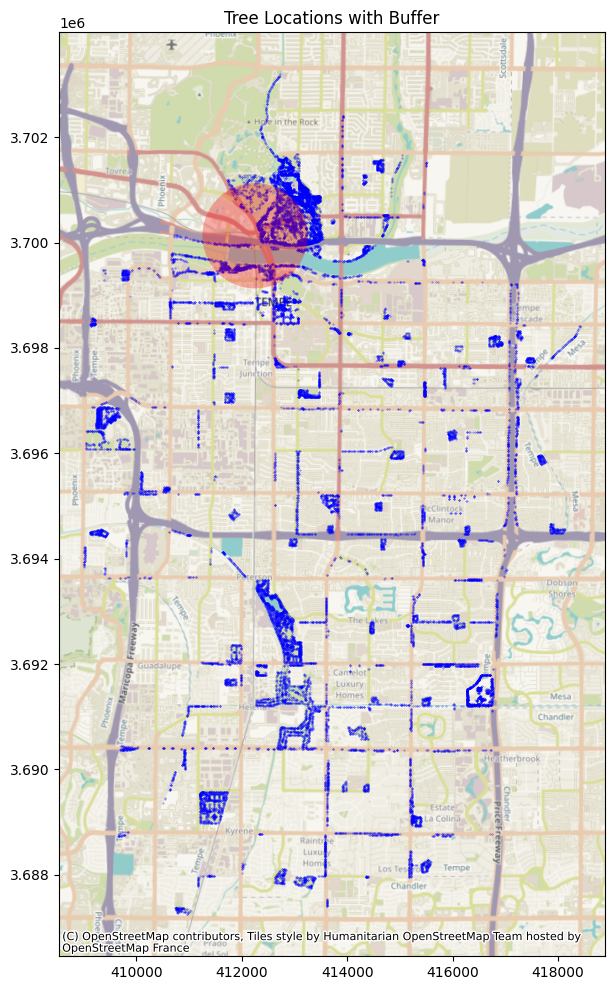

In [2]:
# Code for comprehensive Python programming exercise goes here
# Read tree data
tempe_trees = gpd.read_file('/content/Tree_Inventory.geojson')
tempe_trees_df = gpd.GeoDataFrame(tempe_trees, geometry='geometry', crs='EPSG:4326')
tempe_trees_df = tempe_trees_df.to_crs(32612)

#Widgets for button one
#start widget
start_map1 = widgets.Button(
    description='Start!',
    disabled=False,
    button_style='success',
    tooltip='Click to search')

#address finder widget
address = widgets.Text(
    value='730 N Mill Ave, Tempe, AZ 85288',
    description='Address',
    disabled=False)

#radius widget
radius = widgets.FloatText(
    value=1000,
    description='Buffer Size',
    disabled=False)

#Widget entry for button two
start_map2 = widgets.Button(
    description='Away we go!',
    disabled=False,
    button_style='success',
    tooltip='Click to search')

#df filter
tree_species_filtered = tempe_trees_df['Species_Name'].unique().tolist()
#dropdown widget
tree_species_dropdown = widgets.Dropdown(
    options=tree_species_filtered,
    description='Tree Species',
    disabled=False)

#widgets for button three
#start widget
start_map3 = widgets.Button(
    description='Begin!',
    disabled=False,
    button_style='success',
    tooltip='Click to search')

#slider for analysis
pie_slider = widgets.IntSlider(
    value=10,
    min=1,
    max=100,
    step=1,
    description='How many? ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d')

#Widgets for button 4
start_map4 = widgets.Button(
    description='Do it!',
    disabled=False,
    button_style='success',
    tooltip='Click to search')

#Slider for analysis
scatter_slider = widgets.IntSlider(
    value=10,
    min=1,
    max=100,
    step=1,
    description='How many? ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d')

#Widgets for button 4
start_map5 = widgets.Button(
    description='Be curious!',
    disabled=False,
    button_style='success',
    tooltip='Click to search')

# Set titles for each tab, map 1
inner_tab1 = widgets.Tab(children=[start_map1, address, radius])
inner_tab1.set_title(0, 'Start Button')
inner_tab1.set_title(1, 'Address Finder')
inner_tab1.set_title(2, 'Radius Search')

# Set titles for each tab, map 2
inner_tab2 = widgets.Tab(children=[start_map2, tree_species_dropdown])
inner_tab2.set_title(0, 'Start Button')
inner_tab2.set_title(1, 'Tree Species')

# Set titles for each tab, map 3
inner_tab3 = widgets.Tab(children=[start_map3,pie_slider])
inner_tab3.set_title(0, 'Start Button')
inner_tab3.set_title(1, 'Bar Chart')

# Set titles for each tab, map 4
inner_tab4 = widgets.Tab(children=[start_map4,scatter_slider])
inner_tab4.set_title(0, 'Start Button')
inner_tab4.set_title(1, 'Selection')

# Create outer tab and set titles
outer_tab = widgets.Tab(children=[inner_tab1, inner_tab2,inner_tab3,inner_tab4])

# Set titles for each tab
outer_tab.set_title(0, 'Tree Species Buffer')
outer_tab.set_title(1, 'Tree Species Specific')
outer_tab.set_title(2, 'Bar Chart')
outer_tab.set_title(3, 'Scatter Plot')

# Function for map one analysis
def tree_species_finder(event=None):
    clear_output(wait=True)
    display(outer_tab)

    geocoder = Nominatim(user_agent='Tree Species')
    location = geocoder.geocode(address.value)

    if location:
        print("The full address of your selected location is: ", location.address)
        latitude, longitude = location.latitude, location.longitude
        geocoded = gpd.GeoDataFrame({'xCoordinate': [longitude], 'yCoordinate': [latitude]}, geometry=gpd.points_from_xy([longitude], [latitude]), crs='EPSG:4326')
        geocoded = geocoded.to_crs(32612)

        # Apply buffer
        geocoded_buffer = geocoded.buffer(float(radius.value))
        geocoded_buffer_df = gpd.GeoDataFrame(geometry = geocoded_buffer)

        #Apply the sjoin
        geocoded_join = geocoded_buffer_df.sjoin(tempe_trees_df, how='inner')

        #Trees within the buffer
        num_locations_within_buffer = len(geocoded_join)
        print("The number of trees within the buffer is: ", num_locations_within_buffer)

        #Species Counter
        num_species = len(geocoded_join['Species_Name'].unique())
        print("The number of different species of trees within the buffer is:", num_species)

        #Most common species
        most_common_species = geocoded_join['Species_Name'].value_counts().idxmax()
        print("The most common species of trees within the buffer is:", most_common_species)

        # Plot the buffer and tree locations
        fig, ax = plt.subplots(figsize=(12, 12))  # Create figure and axis
        tempe_trees_df.plot(ax=ax, markersize=0.1, alpha=0.6, color='blue')
        geocoded_buffer_df.plot(ax=ax, color='red', alpha=0.3)
        ax.set_title('Tree Locations with Buffer')
        cx.add_basemap(ax, crs=tempe_trees_df.crs)

    else:
        print("Location not found.")

#Function for map two analysis
def tree_species_overall(event = None):
  clear_output(wait=True)
  display(outer_tab)
  selected_species = tree_species_dropdown.value
  filtered_trees_df = tempe_trees_df[tempe_trees_df['Species_Name'] == selected_species]
  filtered_trees_df = filtered_trees_df.to_crs(32612)
  species_map = filtered_trees_df.plot(markersize=0.4, alpha=0.6, color='Blue', figsize=(12, 12))
  cx.add_basemap(species_map, crs=32612, zoom = 14)

#Function for pie chart analysis, map three
def pie_chart(event = None):
    clear_output(wait=True)
    display(outer_tab)
    trees_count = tempe_trees_df['Species_Name'].value_counts()
    trees_count = trees_count.sort_values(ascending=False)
    top_categories = trees_count.head(pie_slider.value)
    #Map plotting
    plt.figure(figsize=(12, 8))
    plt.bar(top_categories.index, top_categories, color=['maroon', 'green', 'orange', 'blue', 'purple','yellow'])
    plt.title("Tree distribution in Tempe, Arizona")
    plt.xlabel("Species Name")
    plt.ylabel("Tree Count")
    plt.xticks(rotation=45, ha='right')

#Scatter plot function
def scatter_plot(event=None):
    clear_output(wait=True)
    display(outer_tab)
    num_species = scatter_slider.value
    #Finding mean values
    tempe_trees_df_subset = tempe_trees_df.groupby('Species_Name')['Pollution_Removal__oz_yr_'].mean().head(num_species)
    # Convert Series back to DataFrame for analysis
    tempe_trees_df_subset = tempe_trees_df_subset.reset_index()
    tempe_trees_df_subset.plot.scatter('Pollution_Removal__oz_yr_', 'Species_Name', figsize=(12, 12))

#Start buttons for each individual widget
start_map1.on_click(tree_species_finder)
start_map2.on_click(tree_species_overall)
start_map3.on_click(pie_chart)
start_map4.on_click(scatter_plot)
#Display Tab
display(outer_tab)